## ABOUT DATA:
- PREPARED BY IRFAN ALI ROLL NO: 2K22/CSE/48
* NOTE:This dataset has been taken from kaggle website 
* Dataset link: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance


<h2>Problem Statement:</h2>
<p>This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.</p>


### Independent and Dependent Variables
- **Independent Variables**: 
  - `gender`: Categorical variable representing the student's gender.
  - `race_ethnicity`: Categorical variable representing the student's racial or ethnic group.
  - `parental_level_of_education`: Categorical variable indicating the highest education level attained by the student's parent(s).
  - `lunch`: Categorical variable showing the type of lunch the student receives (standard or free/reduced).
  - `test_preparation_course`: Categorical variable indicating whether the student completed a test preparation course or not.
  
- **Dependent Variables**: 
  - `math_score`: Numerical variable representing the student's score in mathematics.
  - `reading_score`: Numerical variable representing the student's score in reading.
  - `writing_score`: Numerical variable representing the student's score in writing.

### Analysis Goals

Depending on the analysis, you might be interested in understanding how the independent variables (gender, race/ethnicity, parental level of education, lunch type, and test preparation course) affect each of the dependent variables (math, reading, and writing scores). For example, you could investigate questions such as:
- Does completing a test preparation course improve scores in all subjects?
- Are there differences in scores based on the type of lunch received?
- How does parental education level correlate with students' scores?
- apply pandas operations and imple linear Regressions

## PROJECT TASKS 

- STEP -01   IMPORT REQUIRED PYTHON PACKAGES.
- STEP -02   LOAD THE DATASETS
- STEP -03   DATA ANALYSIS USING PANDAS 
- STEP -04   SPLIT DATA SET INTO INDEPENDENT/DEPENDENT VARAIBLE
- STEP -05   TRAIN REGRESSION MODEL
- STEP -06   PREDICT THE RESULT 
- STEP -07   PLOT THE TRAINING AND TEST RESULTS 

## STEP-01 IMPORT REQUIRED PYTHON PACKAGES.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression


## STEP-02 LOAD THE DATASETS

<h3>Reading CSV File from Computer </h3>

In [2]:
df=pd.read_csv('study_performance.csv')

## STEP-03 DATA ANALYSIS USING PANDAS 

<h4>Finding Head of given Data </h4>

In [3]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h4>Finding Tail of Given Data</h4>

In [4]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


<h4>Describing Given DATA</h4>
<p>NOTE: here describe data means this function Return a statistically description of the data in the DataFrame:</p>

In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h4>Find the Information of DATA</h4>

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>Finding Unique Numbers</h3>

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## SELECTING A SINGLE COLUMN

In [8]:
df["gender"]

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

### second way to select

In [9]:
df.gender

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

## SELECTING MULTIPLE COLUMNS

In [10]:
df[["gender","race_ethnicity"]]

,gender,race_ethnicity
0,female,group B
1,female,group C
2,female,group B
3,male,group A
4,male,group C
...,...,...
995,female,group E
996,male,group C
997,female,group C
998,female,group D


## How to Store column

In [11]:
genders=df["gender"]
genders

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

## SLICING THE COLUMNS

## single value

In [12]:
genders=df["gender"]
genders[0]


'female'

## contigous values

In [13]:
genders=df["gender"]
genders[1:4]


1    female
2    female
3      male
Name: gender, dtype: object

## Arbitrary values

In [14]:
genders=df["gender"]
genders[[15,16,17]]


15    female
16      male
17    female
Name: gender, dtype: object

## SLICING  WHOLE DATASET DATAFRAME

### SLICE SINGLE VALUE 

In [15]:
slicing_df=df.loc[0,"gender"]
slicing_df

'female'

### SLICE SINGLE ROW 

In [16]:
slicing_row=df.loc[0,:]
slicing_row

gender                                    female
race_ethnicity                           group B
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course                     none
math_score                                    72
reading_score                                 72
writing_score                                 74
Name: 0, dtype: object

# pick out contigous chunk

In [17]:
contigous_chunk=df.loc[0:2,"gender":"race_ethnicity"]
contigous_chunk

,gender,race_ethnicity
0,female,group B
1,female,group C
2,female,group B


# pick out Arbitary chunk:

In [18]:
arbitrary_chunk=df.loc[[1,2,3,4,5,6,7,8,9,10],["gender","race_ethnicity"]]
arbitrary_chunk 

,gender,race_ethnicity
1,female,group C
2,female,group B
3,male,group A
4,male,group C
5,female,group B
6,female,group B
7,male,group B
8,male,group D
9,female,group B
10,male,group C


# Pandas part two built in functions 

## Average function

In [19]:
df.math_score.mean()

66.089

## Max function

In [20]:
max=df["math_score"].max()
max

100

## summary 

In [21]:
summary =df.describe()
summary

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##  CREATING AND DELETING COLUMNS 

In [22]:
df["average"]=" for average"
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,for average
1,female,group C,some college,standard,completed,69,90,88,for average
2,female,group B,master's degree,standard,none,90,95,93,for average
3,male,group A,associate's degree,free/reduced,none,47,57,44,for average
4,male,group C,some college,standard,none,76,78,75,for average


In [23]:
df["total"]=" for total"
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average,total
0,female,group B,bachelor's degree,standard,none,72,72,74,for average,for total
1,female,group C,some college,standard,completed,69,90,88,for average,for total
2,female,group B,master's degree,standard,none,90,95,93,for average,for total
3,male,group A,associate's degree,free/reduced,none,47,57,44,for average,for total
4,male,group C,some college,standard,none,76,78,75,for average,for total


## DELETE MULTIPLE COLUMNS

In [24]:
df.drop(["average","total"],axis=1,inplace=True)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### NOTE:
* AXIS=1 delete specific columns AND AXIS=0  delete specific rows
* inplace=True  change df
* inplace= False return df

# Sorting data frame 

In [25]:
df.sort_values(by="writing_score",inplace=True,ascending=True)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
596,male,group B,high school,free/reduced,none,30,24,15
327,male,group A,some college,free/reduced,none,28,23,19
76,male,group E,some high school,standard,none,30,26,22
980,female,group B,high school,free/reduced,none,8,24,23
...,...,...,...,...,...,...,...,...
970,female,group D,bachelor's degree,standard,none,89,100,100
106,female,group D,master's degree,standard,none,87,100,100
957,female,group D,master's degree,standard,none,92,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100


In [26]:
df.sort_values(by="reading_score",inplace=True,ascending=True)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23
76,male,group E,some high school,standard,none,30,26,22
...,...,...,...,...,...,...,...,...
886,female,group E,associate's degree,standard,completed,93,100,95
381,male,group C,associate's degree,standard,completed,87,100,95
149,male,group E,associate's degree,free/reduced,completed,100,100,93
165,female,group C,bachelor's degree,standard,completed,96,100,100


In [27]:
df.sort_values(by="math_score",inplace=True,ascending=True)
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
149,male,group E,associate's degree,free/reduced,completed,100,100,93
962,female,group E,associate's degree,standard,none,100,100,100


## PANDAS PART THREE CHANGING COLUMN NAMES

In [28]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [29]:
df.rename(columns={"gender":"Gender","race_ethnicity":"Race_ethnicity"} ,inplace=False)

,Gender,Race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
149,male,group E,associate's degree,free/reduced,completed,100,100,93
962,female,group E,associate's degree,standard,none,100,100,100


# MISSING DATA

In [30]:
df=pd.read_csv("study_performance.csv",na_values=["NaN",-1,"not available"])
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Check Duplicates

In [32]:

df.duplicated().sum()

0

In [33]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [35]:
# Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Adding columns for "Total Score" and "Average"

In [36]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [38]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# PLOTING OF DATA

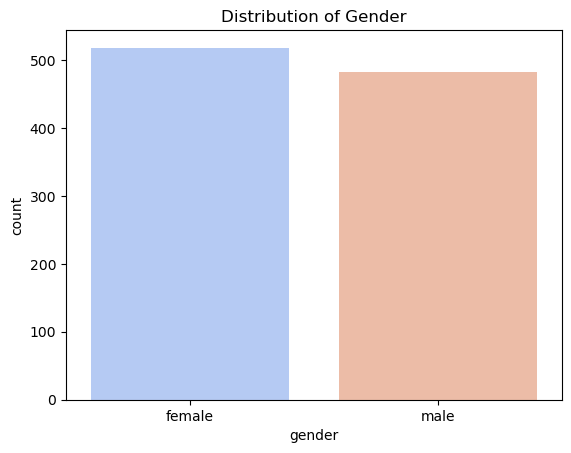

In [39]:
# Count plot for 'gender'
sns.countplot(x='gender', data=df, palette='coolwarm')
plt.title('Distribution of Gender')
plt.show()

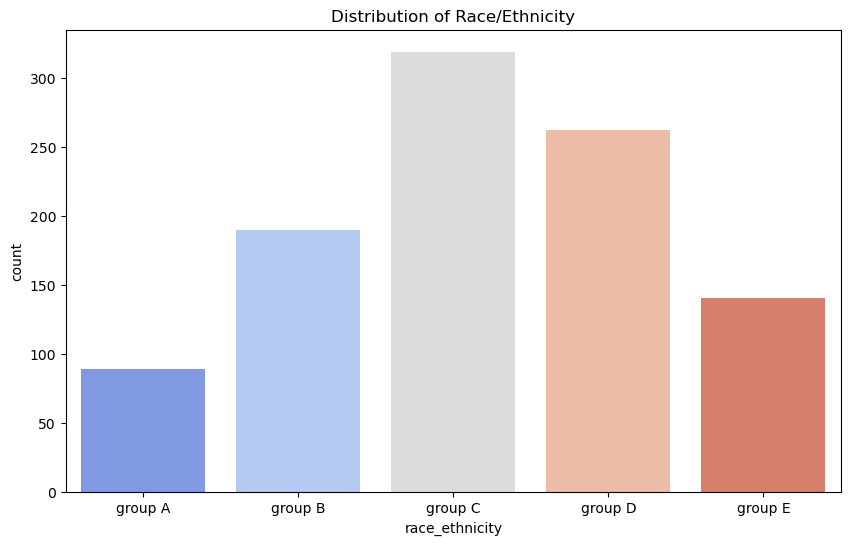

In [40]:
# Count plot for 'race_ethnicity'
plt.figure(figsize=(10, 6))
sns.countplot(x='race_ethnicity', data=df, palette='coolwarm', order=sorted(df['race_ethnicity'].unique()))
plt.title('Distribution of Race/Ethnicity')
plt.show()

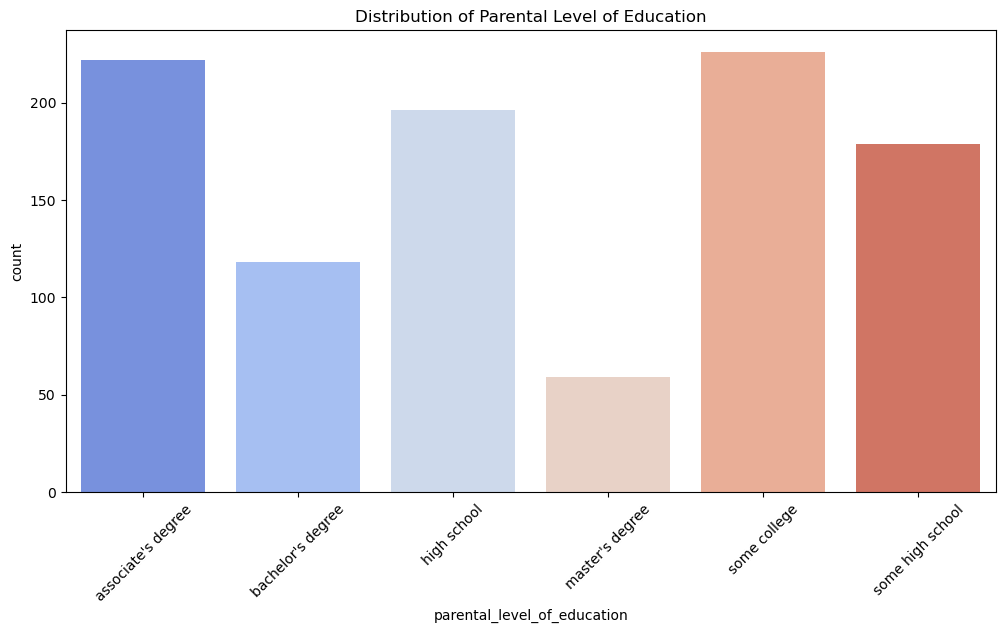

In [41]:
# Count plot for 'parental_level_of_education'
plt.figure(figsize=(12, 6))
sns.countplot(x='parental_level_of_education', data=df, palette='coolwarm', order=sorted(df['parental_level_of_education'].unique()))
plt.title('Distribution of Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

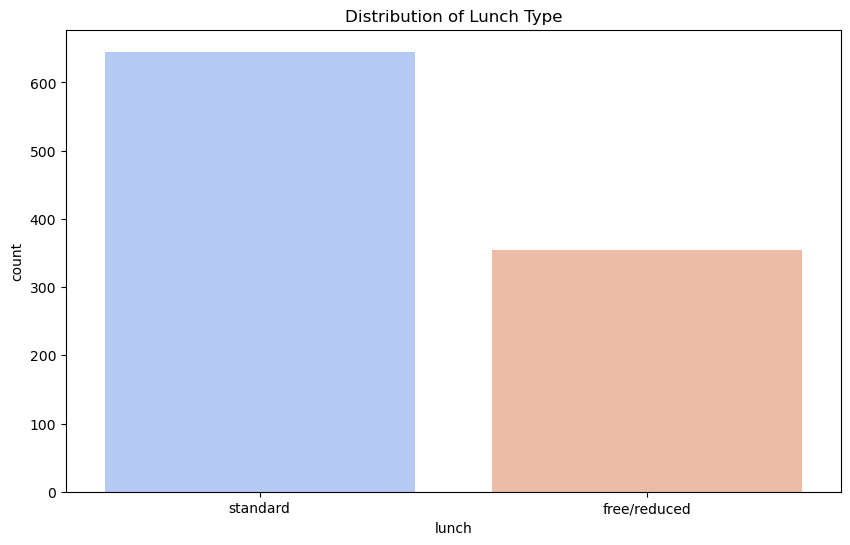

In [42]:
# Count plot for 'lunch'
plt.figure(figsize=(10, 6))
sns.countplot(x='lunch', data=df, palette='coolwarm')
plt.title('Distribution of Lunch Type')
plt.show()

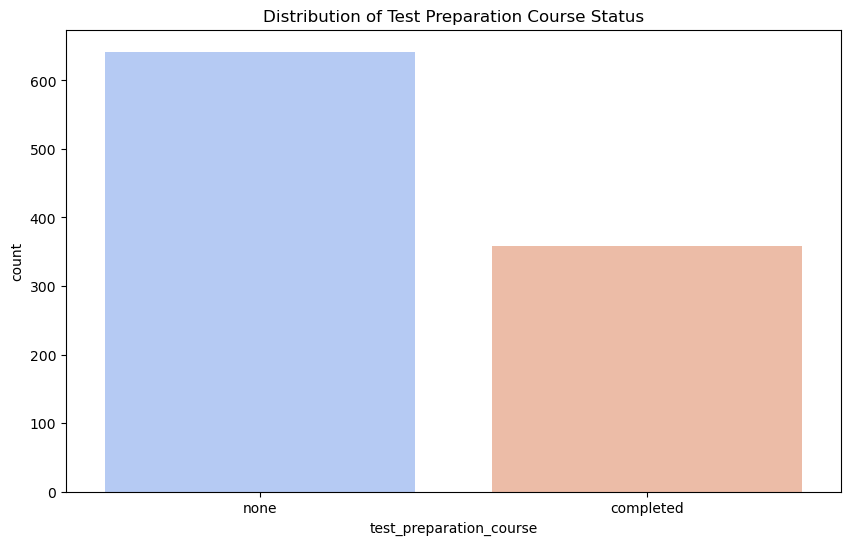

In [43]:

# Count plot for 'test_preparation_course'
plt.figure(figsize=(10, 6))
sns.countplot(x='test_preparation_course', data=df, palette='coolwarm')
plt.title('Distribution of Test Preparation Course Status')
plt.show()

# Relationship between parents  and students average socres in all tests

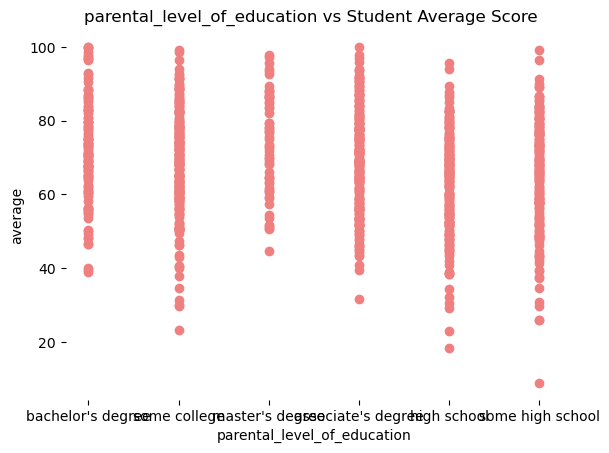

In [44]:
# Relationship between parents  and student average scores
plt.scatter(df['parental_level_of_education'], df['average'], color = 'lightcoral')
plt.title('parental_level_of_education vs Student Average Score ')
plt.xlabel('parental_level_of_education')
plt.ylabel('average')
plt.box(False)
plt.show()

In [45]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# STEP -04 SPLIT DATA SET INTO INDEPENDENT/DEPENDENT VARAIBLE

In [46]:
df = pd.DataFrame(df)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Split into independent (X) and dependent (y) variables
X = df.drop('math_score', axis=1)  # Independent variables
y = df['math_score']  # Dependent variable

In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# STEP-05 TRAIN REGRESSION MODEL

In [48]:
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# STEP -06 PREDICT THE RESULT 

In [49]:

# Predict the results for the test set
y_pred = model.predict(X_test)



# STEP 07 PLOT THE TRAINING AND TEST RESULTS 

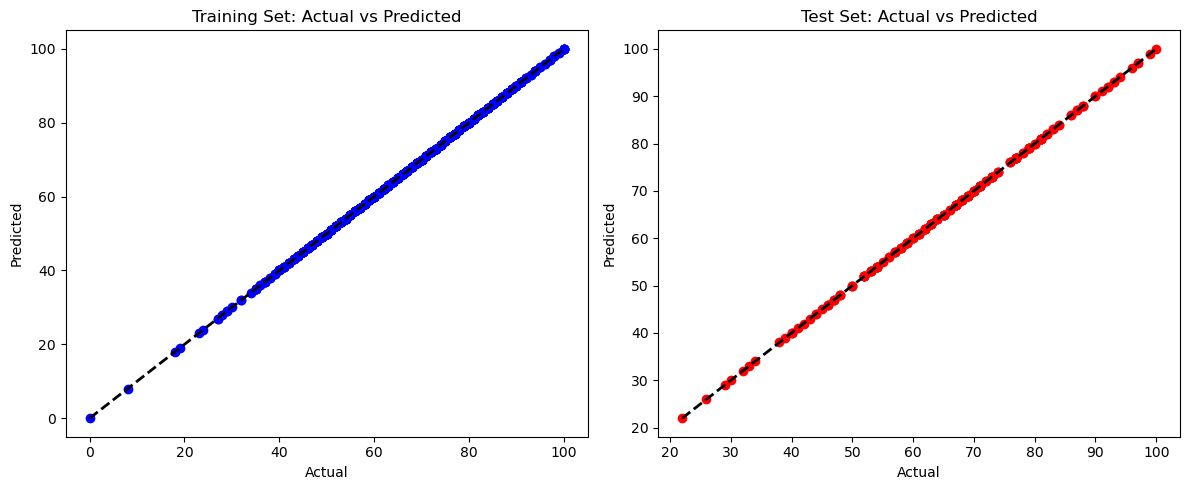

In [50]:

# Plotting training results
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train), color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()


### NOTE:
- In this assigment i used apachie 2.0 licienced data from kaggle website.

## THANK YOU VERY MUCH 